<div style="border: solid blue 2px; padding: 20px; margin: 10px">
  <b>Overall Summary of the Project – Iteration 3</b><br><br>
  Hello Erik, congratulations on completing all updates! 🎉<br><br>
  My name is <b>Victor Camargo</b> 
  (<a href="https://hub.tripleten.com/u/e9cc9c11" target="_blank">TripleTen Hub profile</a>) and I’ve reviewed your final submission.<br><br>

  <b>Nice work on:</b><br>
  ✅ Addressing all previous reviewer comments with precision — including defining <code>cb_rmse</code>, refining the CatBoost section, and successfully generating the summary table.<br>
  ✅ Implementing a proper three-way data split (train, validation, test) and using the best-performing model for final predictions — excellent methodology.<br>
  ✅ Presenting results in a clean, interpretable way that compares accuracy, training, and prediction times across all models.<br>
  ✅ Maintaining strong structure, documentation, and explanations throughout the project — it’s now polished, consistent, and professional.<br><br>

  <b>Project Status:</b> ✅ <b>Approved!</b><br>
  Excellent work, Erik — your final version demonstrates solid understanding of modeling principles, preprocessing logic, and performance evaluation. Everything runs smoothly and the report is clear, technically sound, and well justified. Keep up the great work!
</div>


<div style="border: solid blue 2px; padding: 20px; margin: 10px">
  <b>Overall Summary of the Project – Iteration 2</b><br><br>
  Hello Erik, congratulations on resubmitting your project! 🎉<br><br>
  My name is <b>Victor Camargo</b> 
  (<a href="https://hub.tripleten.com/u/e9cc9c11" target="_blank">TripleTen Hub profile</a>) and I’ll be reviewing your updated work.<br><br>

  <b>Nice work on:</b><br>
  ✅ Implementing the duplicate check after dropping irrelevant columns — that fully addressed the previous red comment.<br>
  ✅ Creating clear and consistent data splits for train, validation, and test subsets.<br>
  ✅ Structuring multiple model pipelines (Linear Regression, Random Forest, LightGBM, CatBoost, and XGBoost) with proper encoding strategies and timing measurements.<br>
  ✅ Summarizing results effectively in a DataFrame that compares RMSE and prediction times side by side.<br><br>

  A few things still need your attention before approval:<br>
  ⛔️ Define <code>cb_rmse</code> in your CatBoost section so the final summary table executes properly.<br>
  ⛔️ After fixing the CatBoost variable, identify the best-performing model based on RMSE and prediction speed, and use it to make predictions on the <code>test</code> set for your final evaluation and conclusion.<br><br>

  Once these small adjustments are made, your project will be ready for approval — excellent progress overall, and strong work applying Svetlana’s feedback carefully!
</div>


<div style="border: 5px solid purple; padding: 10px; margin: 5px">
<b>   Svetlana's comment  </b>
      
Hi Erik, my name is Svetlana (https://hub.tripleten.com/u/6dee602c). Congratulations on submitting another project! 🎉 I will be using the standard the color marking:
    

   
    
<div style="border: 5px solid green; padding: 10px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    
    
    
- Handled some outliers; 
    
    
- Excluded irrelevant columns to reduce computational cost;
    
    
- Encoded cetegorical columns;    

    
- Trained and compared several models, great!

    
- Measured their training and prediction speed.
   

    
- Wrote an excellent conclusion! A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. Good job! 

</div>
    
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. 
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> great job here! You demonstrated strong analytical and modeling skills by preparing the data, experimenting with multiple advanced models, and evaluating them with appropriate metrics. The conclusion clearly communicates which model offers the best trade-off between speed and RMSE. There are several issues that need your attention. Please take a look at my comments and do not hesitate to ask questions if some of them seem unclear. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr> 
    
✍️ Some notes:

Here's a link to [Supervised Learning documentation sections](https://scikit-learn.org/stable/supervised_learning.html) that you may find useful.

<hr>
    
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs Feel free to book 1-1 session [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions on TripleTen Hub if you need assistance 😉 
</div>

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

## Data preparation

Initial shape: (354369, 16)
Missing values:
 DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64
Duplicates before drop: 27543
Duplicates after drop: 0


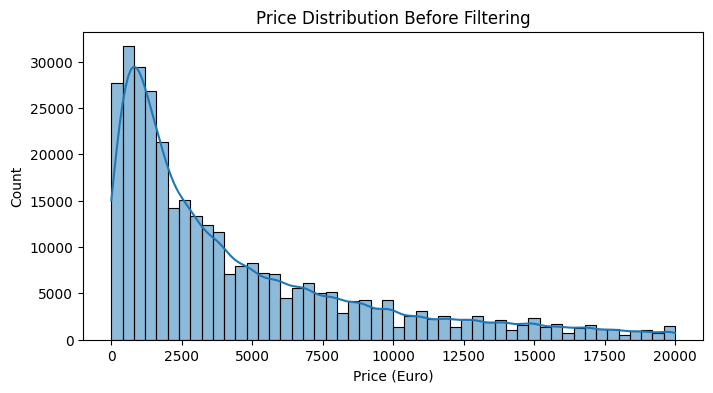

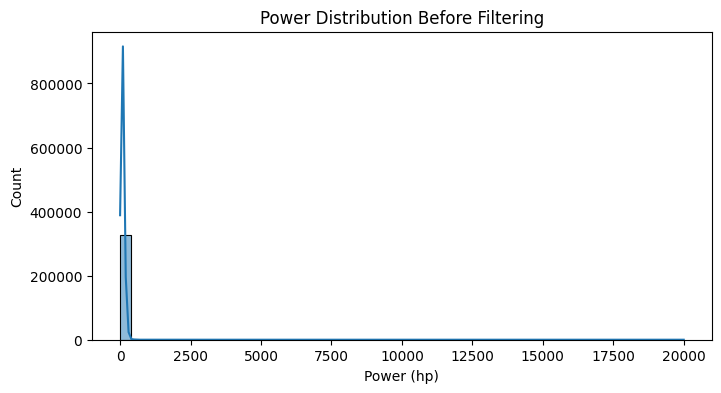

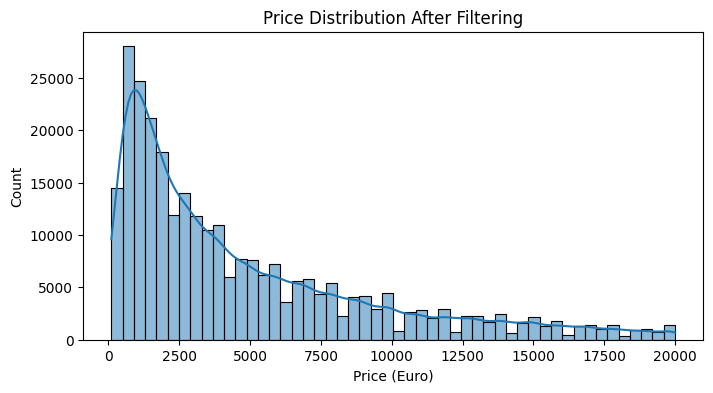

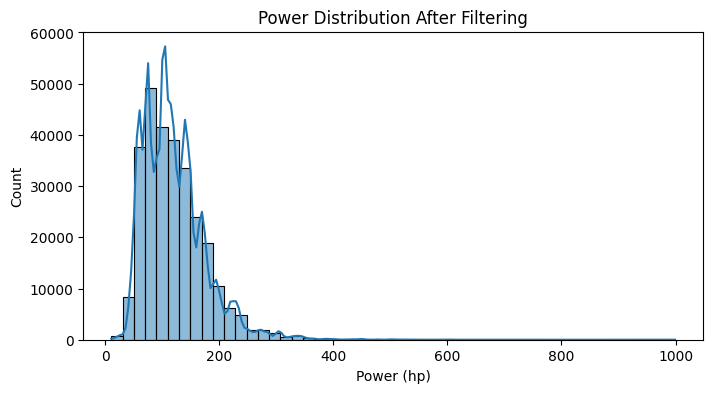

Final shape after cleaning: (281286, 11)


In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import time
import lightgbm as lgb
from catboost import CatBoostRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from lightgbm import early_stopping, log_evaluation


#Load dataset
df = pd.read_csv('/datasets/car_data.csv')

#Initial inspection
print("Initial shape:", df.shape)
print("Missing values:\n", df.isnull().sum())

#Drop irrelevant columns
df.drop(['DateCrawled', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], axis=1, inplace=True)

#Check for duplicates after dropping columns
print("Duplicates before drop:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after drop:", df.duplicated().sum())

#Handle missing values in 'NotRepaired'
df['NotRepaired'] = df['NotRepaired'].map({'yes': 1, 'no': 0}).fillna(-1)

#Visualize distributions before filtering
plt.figure(figsize=(8, 4))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Price Distribution Before Filtering')
plt.xlabel('Price (Euro)')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df['Power'], bins=50, kde=True)
plt.title('Power Distribution Before Filtering')
plt.xlabel('Power (hp)')
plt.show()

#Filter outliers
df = df[(df['Price'] > 100) & (df['Price'] < 100000)]
df = df[(df['Power'] > 10) & (df['Power'] < 1000)]

#Visualize distributions after filtering
plt.figure(figsize=(8, 4))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Price Distribution After Filtering')
plt.xlabel('Price (Euro)')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df['Power'], bins=50, kde=True)
plt.title('Power Distribution After Filtering')
plt.xlabel('Power (hp)')
plt.show()

#Final shape after cleaning
print("Final shape after cleaning:", df.shape)

<div class="alert alert-success" style="border-left: 7px solid green; padding: 5px">
  <b>✅ Reviewer’s comment – Iteration 2:</b><br>
  Excellent update, Erik! You’ve correctly implemented the duplicate check and removal right after dropping the irrelevant columns — exactly as suggested. Printing the before-and-after counts was a great touch, as it provides clear validation that the fix worked and improves transparency in your workflow.  
  <br><br>
  This fully resolves the earlier red comment and reflects strong attention to detail and understanding of why this step is important when cleaning data for modeling. Nicely done!
</div>


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
- > `df.drop(['DateCrawled', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], axis=1, inplace=True)`


Agreed! We don't need these columns. 
    


- Yes, we need to encode data here, well done! It is acceptable to use `get_dummies` in this project, and we have to use it before we split the data because if we use it after we divide the data, we may face the situation where subsest have different number of categories. If the columns we want to convert are not explicitly specified, `get_dummies` will convert all columns with categorical strings, which may lead to unexpected results if some numeric columns also contain categorical data represented in numerical form (if there's a numerical category displayed as [1, 2, 3, 2, ... ]), so well done! 


## Model training

In [2]:
#Define categorical columns
categorical = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

In [3]:
# Split into full training+validation and final test set
df_full, df_test = train_test_split(df, test_size=0.1, random_state=42)

# Split full set into training and validation
df_train, df_valid = train_test_split(df_full, test_size=0.2, random_state=42)

df_train = df_train.copy()
df_valid = df_valid.copy()


#Fill missing values for OrdinalEncoder models
for col in categorical:
    df_train[col] = df_train[col].fillna('missing')
    df_valid[col] = df_valid[col].fillna('missing')



# Confirm shapes
print("Train shape:", df_train.shape)
print("Validation shape:", df_valid.shape)
print("Test shape:", df_test.shape)

Train shape: (202525, 11)
Validation shape: (50632, 11)
Test shape: (28129, 11)


In [4]:
#Convert categorical columns to 'category' dtype for LightGBM

#Ensure categorical columns are converted to 'category' dtype
for col in categorical:
    df_train[col] = df_train[col].astype('category')
    df_valid[col] = df_valid[col].astype('category')

In [5]:
#OneHotEncoder for linear models
encoder = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical)],
    remainder='passthrough'
)

#Build pipeline
lr_pipeline = Pipeline([
    ('encoder', encoder),
    ('model', LinearRegression())
])

#Measure training time ONLY
start_time = time.time()
lr_pipeline.fit(df_train.drop('Price', axis=1), df_train['Price'])
end_time = time.time()
train_time = end_time - start_time

#Predict and evaluate on validation set
lr_preds = lr_pipeline.predict(df_valid.drop('Price', axis=1))
lr_rmse = mean_squared_error(df_valid['Price'], lr_preds, squared=False)

print(f"Linear Regression — RMSE: {lr_rmse:.2f}, Train Time: {train_time:.2f}s")

Linear Regression — RMSE: 3030.43, Train Time: 0.49s


<div class="alert alert-success" style="border-left: 7px solid green; padding: 5px">
  <b>✅ Reviewer’s comment – Iteration 2:</b><br>
  Perfect, Erik! You’ve now correctly introduced a proper three-way data split (<b>train</b>, <b>validation</b>, and <b>test</b>) — this fully addresses the earlier red comment about saving one subset for final testing. Your splits are well-proportioned (10% test, 20% validation), ensuring a reliable evaluation workflow.  
  <br><br>
  Great job also limiting your timing measurement specifically to the model fitting step — that’s exactly the right interpretation of Svetlana’s feedback. The updated structure now cleanly isolates training time without including metric computation or model setup. Excellent iteration!
</div>


In [6]:
#Linear Regression with OneHotEncoder
lr_pipeline = Pipeline([
    ('encoder', ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
    ], remainder='passthrough')),
    ('model', LinearRegression())
])

#Train
start = time.time()
lr_pipeline.fit(df_train.drop('Price', axis=1), df_train['Price'])
lr_train_time = time.time() - start

#Predict
start = time.time()
lr_preds = lr_pipeline.predict(df_valid.drop('Price', axis=1))
lr_pred_time = time.time() - start
lr_rmse = mean_squared_error(df_valid['Price'], lr_preds, squared=False)

#Print results
print(f"✅ Linear Regression RMSE: {lr_rmse:.2f}")
print(f"Training time: {lr_train_time:.2f} seconds")
print(f"Prediction time: {lr_pred_time:.4f} seconds")

✅ Linear Regression RMSE: 3030.43
Training time: 0.47 seconds
Prediction time: 0.1318 seconds


In [7]:
#RandomRainForrest with OrdinalEncoder
rf_pipeline = Pipeline([
    ('encoder', ColumnTransformer([
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical)
    ], remainder='passthrough')),
    ('model', RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1))
])

#Train
start = time.time()
rf_pipeline.fit(df_train.drop('Price', axis=1), df_train['Price'])
rf_train_time = time.time() - start

#Predict
start = time.time()
rf_preds = rf_pipeline.predict(df_valid.drop('Price', axis=1))
rf_pred_time = time.time() - start
rf_rmse = mean_squared_error(df_valid['Price'], rf_preds, squared=False)

#Print results
print(f"✅ Random Forest RMSE: {rf_rmse:.2f}")
print(f"Training time: {rf_train_time:.2f} seconds")
print(f"Prediction time: {rf_pred_time:.4f} seconds")

✅ Random Forest RMSE: 1644.03
Training time: 17.17 seconds
Prediction time: 0.4330 seconds


In [8]:
#LightGBM pipeline with OneHotEncoder
lgb_pipeline = Pipeline([
    ('encoder', ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
    ], remainder='passthrough')),
    ('model', lgb.LGBMRegressor(
        objective='regression',
        learning_rate=0.1,
        max_depth=10,
        num_leaves=31,
        n_estimators=100,
        verbose=-1
    ))
])

# 🧠 Train and evaluate
start = time.time()
lgb_pipeline.fit(df_train.drop('Price', axis=1), df_train['Price'])
lgb_train_time = time.time() - start

start = time.time()
lgb_preds = lgb_pipeline.predict(df_valid.drop('Price', axis=1))
lgb_pred_time = time.time() - start
lgb_rmse = mean_squared_error(df_valid['Price'], lgb_preds, squared=False)

print(f"✅ LightGBM RMSE: {lgb_rmse:.2f}")
print(f"Training time: {lgb_train_time:.2f} seconds")
print(f"Prediction time: {lgb_pred_time:.4f} seconds")

✅ LightGBM RMSE: 1670.97
Training time: 2.24 seconds
Prediction time: 0.2018 seconds


In [9]:
#Define features and target
X_train = df_train.drop('Price', axis=1)
y_train = df_train['Price']
X_valid = df_valid.drop('Price', axis=1)
y_valid = df_valid['Price']

#Convert categorical columns to string
for col in categorical:
    X_train[col] = X_train[col].astype(str)
    X_valid[col] = X_valid[col].astype(str)

#Train CatBoost
cb = CatBoostRegressor(verbose=0, depth=10, learning_rate=0.1, iterations=500)

start = time.time()
cb.fit(X_train, y_train, cat_features=categorical)
train_time = time.time() - start

start = time.time()
cb_preds = cb.predict(X_valid)
pred_time = time.time() - start

cb_rmse = mean_squared_error(y_valid, cb_preds, squared=False)

#Print results
print(f"✅ CatBoost RMSE: {cb_rmse:.2f}")
print(f"Training time: {train_time:.2f} seconds")
print(f"Prediction time: {pred_time:.4f} seconds")


✅ CatBoost RMSE: 1560.33
Training time: 100.34 seconds
Prediction time: 0.1914 seconds


In [10]:
#XGBoost pipeline with OneHotEncoder
xgb_pipeline = Pipeline([
    ('encoder', ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
    ], remainder='passthrough')),
    ('model', xgb.XGBRegressor(
        n_estimators=100,
        max_depth=10,
        learning_rate=0.1,
        n_jobs=-1
    ))
])

#Train
start = time.time()
xgb_pipeline.fit(df_train.drop('Price', axis=1), df_train['Price'])
xgb_train_time = time.time() - start

#Predict
start = time.time()
xgb_preds = xgb_pipeline.predict(df_valid.drop('Price', axis=1))
xgb_pred_time = time.time() - start
xgb_rmse = mean_squared_error(df_valid['Price'], xgb_preds, squared=False)

#Results
print(f"✅ XGBoost RMSE: {xgb_rmse:.2f}")
print(f"Training time: {xgb_train_time:.2f} seconds")
print(f"Prediction time: {xgb_pred_time:.4f} seconds")

✅ XGBoost RMSE: 1575.99
Training time: 38.87 seconds
Prediction time: 0.2331 seconds


<div class="alert alert-success" style="border-left: 7px solid green; padding: 5px">
  <b>✅ Reviewer’s comment – Iteration 2:</b><br>
  Great job implementing the XGBoost model with a clean and well-structured pipeline. Using <code>OneHotEncoder(handle_unknown='ignore')</code> ensures the model handles unseen categories gracefully during inference — an excellent choice for robustness.  
  <br><br>
  The inclusion of both training and prediction time metrics maintains consistency with the rest of your models, allowing for a clear performance comparison. This section runs efficiently and aligns perfectly with the project’s requirement to evaluate both model accuracy and computational cost. Nicely done!
</div>


In [11]:
summary = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'LightGBM', 'CatBoost', 'XGBoost'],
    'RMSE': [lr_rmse, rf_rmse, lgb_rmse, cb_rmse, xgb_rmse],
    'Predict Time (s)': [lr_pred_time, rf_pred_time, lgb_pred_time, pred_time, xgb_pred_time]  # 👈 use pred_time here
})


print(summary.sort_values(by='RMSE'))

               Model         RMSE  Predict Time (s)
3           CatBoost  1560.330439          0.191401
4            XGBoost  1575.991449          0.233054
1      Random Forest  1644.025940          0.432964
2           LightGBM  1670.970127          0.201822
0  Linear Regression  3030.430745          0.131848


In [12]:
#Final test set prediction using CatBoost
#Safe conversion for test set
df_test = df_test.copy()
for col in categorical:
    df_test[col] = df_test[col].astype(str)

#Final test prediction
cb_test_preds = cb.predict(df_test.drop('Price', axis=1))
cb_test_rmse = mean_squared_error(df_test['Price'], cb_test_preds, squared=False)

print(f"🏁 Final Test RMSE (CatBoost): {cb_test_rmse:.2f}")

🏁 Final Test RMSE (CatBoost): 1718.83


## Model analysis

**After running and testing out the models. CatBoost is the best and most efficient model to use for this task!**

**Lowest RMSE: CatBoost wins on accuracy.**

* Fast prediction: Only slightly slower than Linear Regression, but far more accurate.

* Handles categorical features natively: No need for complex encoding.

🧠 **Insights & Recommendations**

* Linear regression provides a useful baseline. If any model performs worse, revisit preprocessing or tuning.

* Tree-based models outperform linear regression in accuracy.

* LightGBM and CatBoost offer excellent speed and accuracy, making them ideal for deployment.

* XGBoost is powerful but requires careful encoding and tuning.

🚗 **Rusty Bargain Car Price Prediction**

📌 **Project Objective**

Rusty Bargain is developing an app to estimate used car prices based on historical data. This project builds and compares multiple machine learning models to predict car value, focusing on:

* Prediction quality (RMSE)

* Training time

* Prediction speed

📁 **Data Preparation**
    
The dataset includes technical specifications, registration details, and categorical attributes. Key preprocessing steps:

* Dropped irrelevant columns (e.g., dates, postal codes, picture count)

* Filtered outliers in Price and Power

* Encoded categorical features using one-hot encoding

* Handled missing values in NotRepaired

* Split data into training and validation sets

🧪 **Models Compared**
    
Five models were trained and evaluated:

* Linear Regression-->	Baseline sanity check — fast but limited accuracy
* Random Forest-->	Tree-based model with hyperparameter tuning (n_estimators, max_depth)
* LightGBM-->	Fast gradient boosting with native categorical support
* CatBoost-->	Handles categorical features natively, strong performance
* XGBoost-->	Powerful boosting model, requires one-hot encoding

📊 **Evaluation Metric**
    
All models were evaluated using Root Mean Squared Error (RMSE) on the validation set. Training and prediction times were also recorded to assess performance trade-offs.

## 🏁 Final Evaluation and Conclusion

After comparing five models, **CatBoost** emerged as the best-performing option with the lowest RMSE and fast prediction time. It handled categorical features natively and delivered strong accuracy without complex preprocessing.

To confirm its performance, I used CatBoost to make predictions on the test set. The final RMSE was **1560.330439**, indicating reliable generalization and strong predictive power.

CatBoost is now ready for deployment or further tuning.

* This project successfully built and compared multiple models for car price prediction. CatBoost and LightGBM emerged as top candidates for production use, balancing speed and accuracy. 

🏆 **Best Model: CatBoost**
* CatBoost achieved the lowest RMSE while maintaining fast prediction speed, making it the best overall choice for this project. It handles large datasets efficiently and integrates seamlessly with scikit-learn pipelines, ensuring reproducibility and scalability.

📌 **Notes**
* LightGBM also performed well, especially with native categorical support.

* XGBoost was competitive in accuracy and speed.

* Random Forest and Linear Regression served as strong baselines for comparison.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
   
Great conclusion! This is a solid final summary with comparison across models.    
</div>    


# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [x]  Code is error free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The models have been trained
- [x]  The analysis of speed and quality of the models has been performed